In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df19= pd.read_csv('/content/drive/My Drive/Projects/Flight Delay/Jan_2019_ontime.csv')
df20= pd.read_csv('/content/drive/My Drive/Projects/Flight Delay/Jan_2020_ontime.csv')

In [3]:
df19.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [4]:
df19['Date']=pd.to_datetime('2020-01-'+df19['DAY_OF_MONTH'].apply(str))

In [5]:
df19['DAY_NAME']= df19['Date'].dt.day_name()

In [6]:
df19.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,Date,DAY_NAME
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2020-01-01,Wednesday
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2020-01-01,Wednesday
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2020-01-01,Wednesday
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2020-01-01,Wednesday
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2020-01-01,Wednesday


In [7]:
carrier= pd.DataFrame(df19['OP_CARRIER'].value_counts().reset_index().values, columns=["OP_CARRIER", "AggregateOP"])

In [8]:
carrier= carrier.sort_values('AggregateOP',ascending=True)

In [9]:
carrier.head()

,OP_CARRIER,AggregateOP
16,G4,6763
15,HA,6798
14,F9,9647
13,EV,13195
12,NK,15222


In [10]:
import plotly.express as px
import plotly.graph_objects as go
#plt.figure(figsize=(12,6))
#sns.barplot('OP_CARRIER','AggregateOP',data=carrier,)
#plt.show()

fig = px.bar(carrier, y='AggregateOP', x='OP_CARRIER', text='AggregateOP', opacity = 0.8)
fig.add_trace(go.Scatter(x=carrier['OP_CARRIER'], y=carrier['AggregateOP'],
                    mode='lines+markers',opacity = 0.3,showlegend=False,
                   line = dict(
        smoothing = 1.2, color = 'blue',
        shape = "spline"
    )))

fig.show()

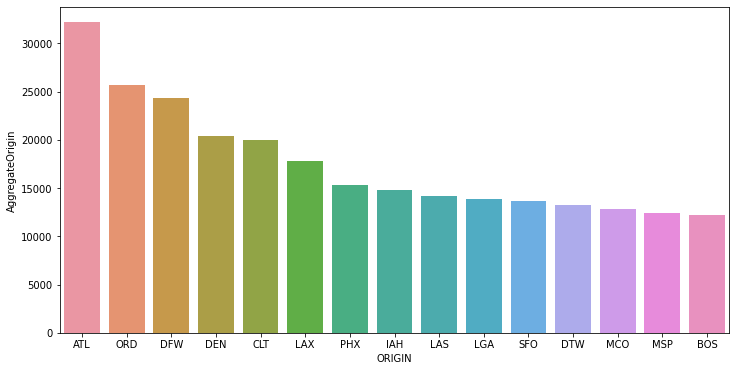

In [11]:
df_Org = pd.DataFrame(df20['ORIGIN'].value_counts().reset_index().values, columns=["ORIGIN", "AggregateOrigin"])
df_Org=df_Org.head(15)
plt.figure(figsize=(12,6))
sns.barplot('ORIGIN','AggregateOrigin',data=df_Org)
plt.show()

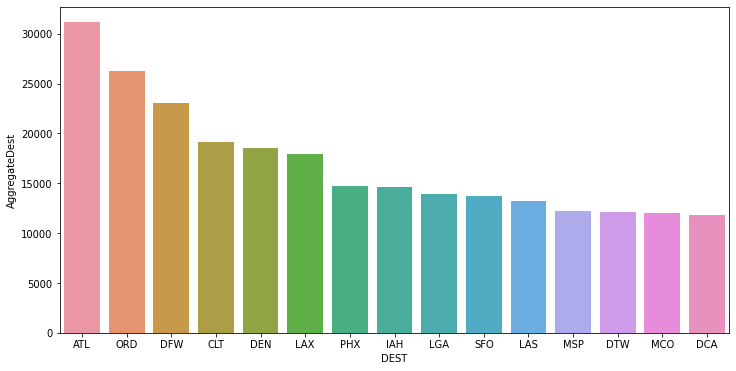

In [12]:
###Businest airport.
df_dest = pd.DataFrame(df19['DEST'].value_counts().reset_index().values, columns=["DEST", "AggregateDest"])
df_dest=df_dest.head(15)
plt.figure(figsize=(12,6))
sns.barplot('DEST','AggregateDest',data=df_dest)
plt.show()

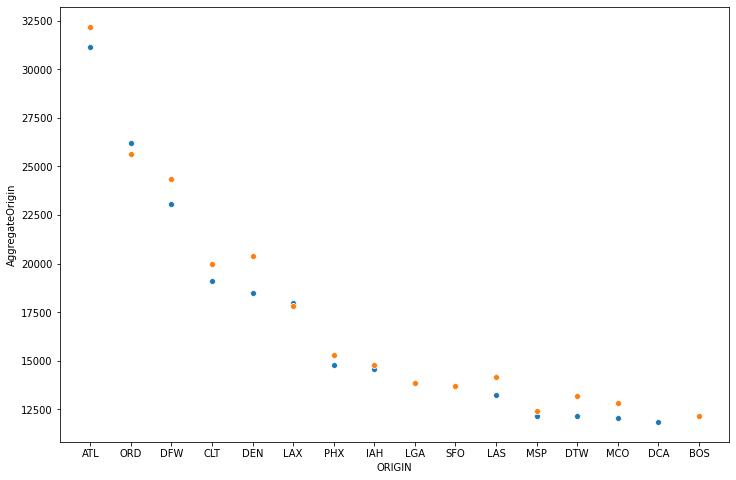

In [13]:
##comparision of both origin and destination
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_dest['DEST'], y=df_dest['AggregateDest'],palette=cmap)
sns.scatterplot(x=df_Org['ORIGIN'], y=df_Org['AggregateOrigin'],palette=cmap)
plt.show()

In [14]:
df=df19['DEP_DEL15'].value_counts()[0],df19['DEP_DEL15'].value_counts()[1]

In [15]:
from plotly.subplots import make_subplots
labels = ["Delayed (<15 minutes)", "Delayed (>15 minutes)"]
colors = ['lightgreen','red']
values_arr = [df19['ARR_DEL15'].value_counts()[0],df19['ARR_DEL15'].value_counts()[1]]

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Departures', 'Arrivals'])
fig.add_trace(go.Pie(labels=labels, values=df, pull=[0, 0.1],textinfo = 'label+percent'),1,1)
fig.add_trace(go.Pie(labels=labels, values=values_arr, pull=[0, 0.1],textinfo = 'label+percent'),1,2)
fig.update_traces( textinfo='value', textfont_size=14,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
#fig.update_layout(uniformtext_minsize=4, uniformtext_mode='hide', title_text='Flights Delayed', title_x = 0.5, legend_title='<b>Flights</b>',legend=dict(x=.45, y=0.6))


fig.show()


In [16]:
df_time = pd.DataFrame(df19['DEP_TIME_BLK'].value_counts().reset_index().values, columns=["DEP_TIME_BLK", "AggregateDepTime"])

df_time = df_time.sort_values('DEP_TIME_BLK',ascending=True)

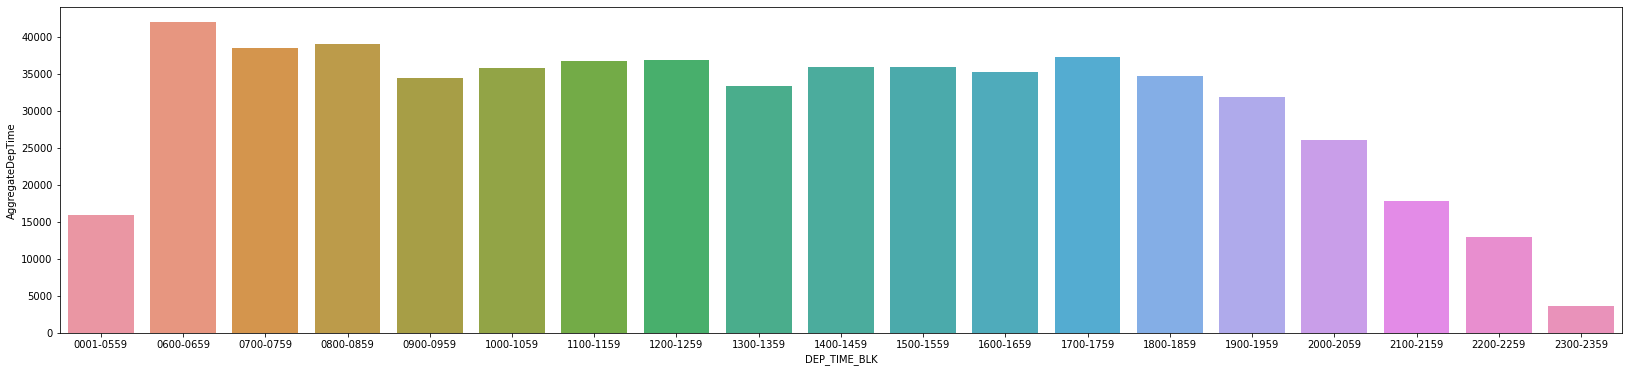

In [17]:
plt.figure(figsize=(28,6))
sns.barplot('DEP_TIME_BLK','AggregateDepTime',data=df_time)
plt.show()

In [18]:
##flight by hault


df19['FlightType'] = 'Short Haul'
df19.loc[(df19['DISTANCE'] >= 800) & (df20['DISTANCE'] <= 2200), 'FlightType'] = 'Medium Haul'
df19.loc[(df19['DISTANCE'] > 2200), 'FlightType'] = 'Long Haul'

df_flight = pd.DataFrame(df19['FlightType'].value_counts().reset_index().values, columns=["FlightType", "AggregateType"])
labels = ["Short Haul","Medium Haul","Long Haul"]
value = [df_flight['AggregateType'][0],df_flight['AggregateType'][1],df_flight['AggregateType'][2]]
# colors=['lightcyan','cyan','royalblue']
figs = go.Figure(data=[go.Pie(labels=labels, values=value, pull=[0, 0, 0.3],textinfo = 'label+percent', hole = 0.3, hoverinfo="label+percent")])
figs.update_traces( textinfo='label + percent', textfont_size=10)
figs.update_layout(
    title_text="<b>Fligts By Distance<b> <i>(in Miles)<i>",title_x = 0.5, font_size = 12,legend=dict(x=.75, y=0.55),
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='<b>Distance<b>', x=0.5, y=0.5, font_size=11, showarrow=False)]
)
figs.show()

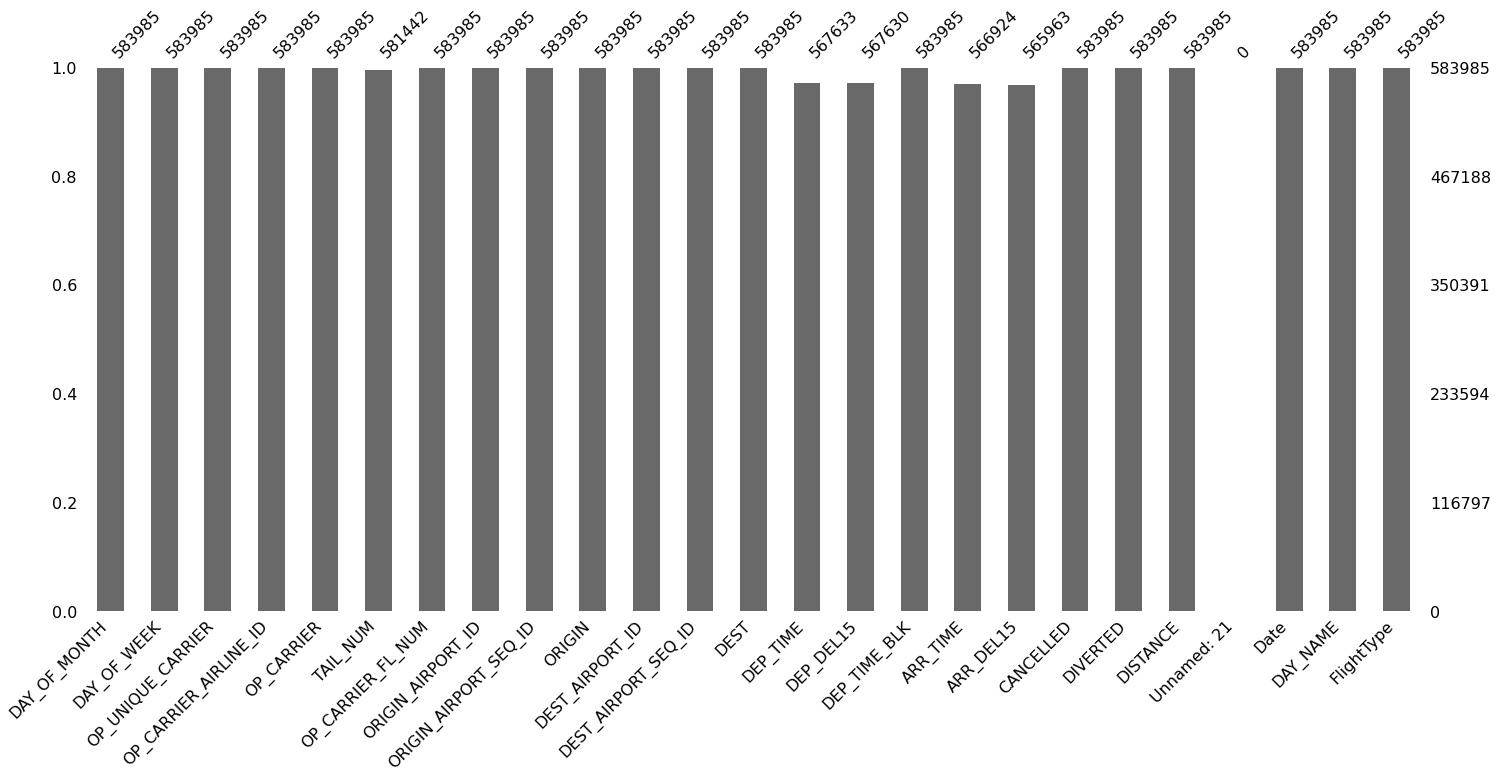

In [22]:
##missing data analysis
import missingno as msno
plt.figure(figsize=(5,5))
msno.bar(df19)

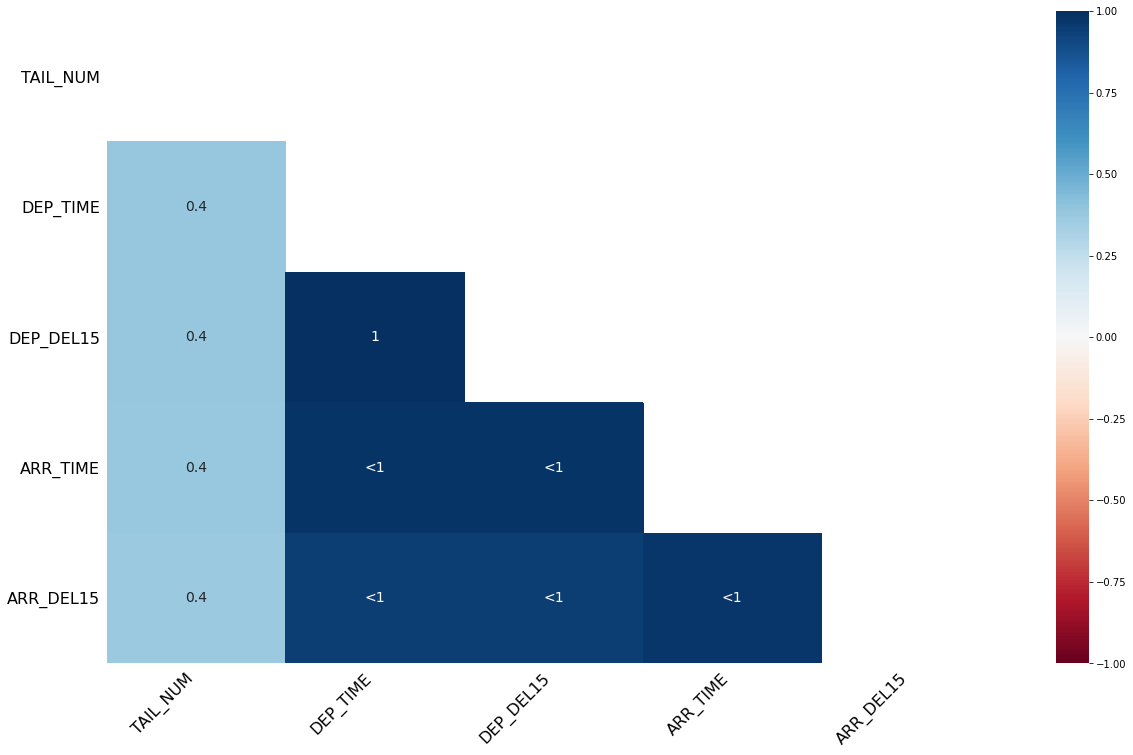

In [23]:
msno.heatmap(df19) 

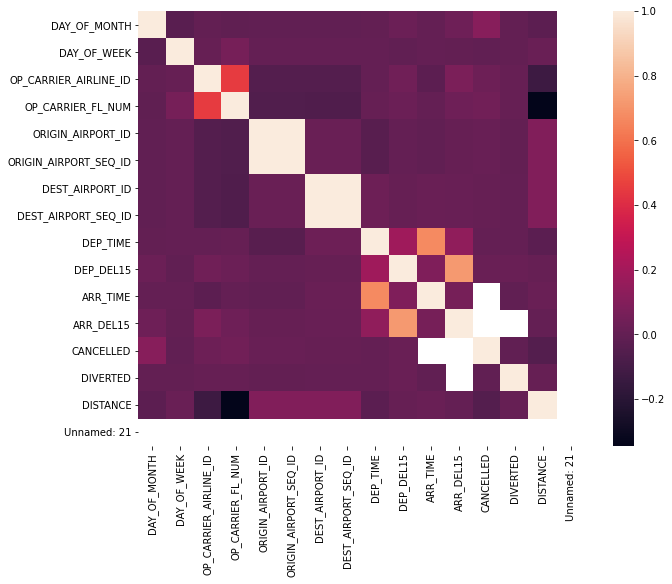

In [26]:
##correlation
plt.figure(figsize=(10,8))
corr = df19.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()